In [4]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
nobel = pd.read_csv('nobel.csv')
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


### What is the most commonly awarded gender and birth country?

In [5]:
# count sex of nobel prize winners
display(nobel.sex.value_counts())
display(nobel.birth_country.value_counts())

# convert birth_country and count into a dataframe
birth_country = nobel.birth_country.value_counts().reset_index()
print(birth_country.head()) # not yet a dataframe
birth_country.columns = ['birth_country', 'count']
display(birth_country.head())

sex
Male      905
Female     65
Name: count, dtype: int64

birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 129, dtype: int64

              birth_country  count
0  United States of America    291
1            United Kingdom     91
2                   Germany     67
3                    France     58
4                    Sweden     30


,birth_country,count
0,United States of America,291
1,United Kingdom,91
2,Germany,67
3,France,58
4,Sweden,30


In [6]:
# What is the most commonly awarded gender and birth country?
top_gender = 'Male'
top_country = 'United States of America'

### 瞎研究

In [7]:
# show all column names
print(nobel.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [23]:
# step 1: create columns for US_born_winner and decade
nobel['US_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born_winner,decade,Female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [25]:
# step 2: calculate the proportion of US born winners per decade and sort
groupby_decade = nobel.groupby('decade').US_born_winner.mean()
groupby_decade = groupby_decade.reset_index()
groupby_decade.columns = ['decade', 'US_born_winner_ratio']
# sort by US_born_winner_ratio
groupby_decade = groupby_decade.sort_values('US_born_winner_ratio', ascending=False)
display(groupby_decade)

,decade,US_born_winner_ratio
10,2000,0.422764
9,1990,0.403846
12,2020,0.360000
8,1980,0.319588
7,1970,0.317308
11,2010,0.314050
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
3,1930,0.250000


#### If I am still confused, check the question below. But in this case, it would mean 0.422764 of all winners in the decade 2000 is US-born.

In [10]:
import pandas as pd

# Sample data
data = {
    'Category': ['A', 'B', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Values': [10, 20, 15, 25, 30, 5, 35, 40]
}

df = pd.DataFrame(data)
display(df)

# Group by 'Category' and calculate the mean of 'Values'
grouped_df = df.groupby('Category').mean()
display(grouped_df)

,Category,Values
0,A,10
1,B,20
2,A,15
3,B,25
4,C,30
5,A,5
6,B,35
7,C,40


,Values
Category,
A,10.000000
B,26.666667
C,35.000000


<Axes: xlabel='decade', ylabel='US_born_winner_ratio'>

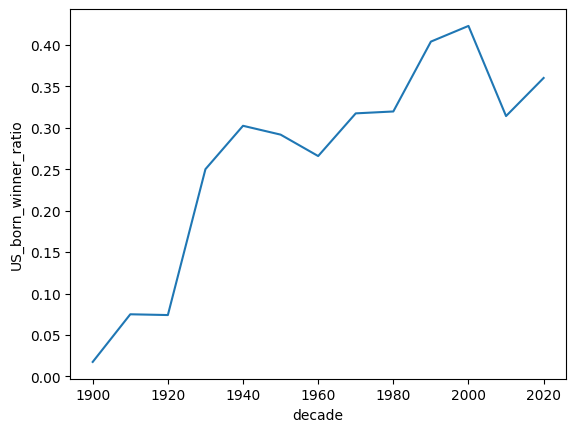

In [11]:
# step 3: plot the US_born_winner_ratio
sns.lineplot(x='decade', y='US_born_winner_ratio', data=groupby_decade)

In [12]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
max_decade_USA = 2000

### Clarifying dataset:
I mainly don't understand why I would use mean()

In [26]:
# only keep name, category, decade, gender for nobel
simplified_nobel = nobel[['category', 'decade', 'sex']]
simplified_nobel = simplified_nobel.head(25)
simplified_nobel


,category,decade,sex
0,Chemistry,1900,Male
1,Literature,1900,Male
2,Medicine,1900,Male
3,Peace,1900,Male
4,Peace,1900,Male
5,Physics,1900,Male
6,Chemistry,1900,Male
7,Literature,1900,Male
8,Medicine,1900,Male
9,Peace,1900,Male


In [14]:
simplified_nobel['Female'] = simplified_nobel['sex'] == 'Female' # adding a column as a boolean
grouped = simplified_nobel.groupby(['decade', 'category']).Female.mean().reset_index()
grouped # we are calculating the proportion of women in the entire population of winners in that category and decade.

,decade,category,Female
0,1900,Chemistry,0.000000
1,1900,Literature,0.000000
2,1900,Medicine,0.000000
3,1900,Peace,0.000000
4,1900,Physics,0.166667


In [15]:
physics = simplified_nobel[simplified_nobel['category'] == 'Physics']
physics # As we can see, Female's ratio in the 1900-Physics combo would be 1/6 = 0.166667.

,category,decade,sex,Female
5,Physics,1900,Male,False
11,Physics,1900,Male,False
12,Physics,1900,Male,False
17,Physics,1900,Male,False
18,Physics,1900,Male,False
19,Physics,1900,Female,True


In [16]:
# Get female in physics in case I want to know how to filter using two conditions
physics_and_female = simplified_nobel[(simplified_nobel['category'] == 'Physics') & (simplified_nobel['sex'] == 'Female')]
display(physics_and_female) 

,category,decade,sex,Female
19,Physics,1900,Female,True


### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [17]:
# add a column to determine if a winner is female
nobel['Female'] = nobel['sex'] == 'Female'
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born_winner,decade,Female
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,...,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,...,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),...,Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,...,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,...,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


In [18]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
groupby_decade_category = nobel.groupby(['decade', 'category']).Female.mean().reset_index()
display(groupby_decade_category.sort_values('Female', ascending=False))

,decade,category,Female
68,2020,Literature,0.500000
64,2010,Peace,0.357143
50,1990,Literature,0.300000
56,2000,Literature,0.300000
66,2020,Chemistry,0.300000
...,...,...,...
34,1960,Peace,0.000000
37,1970,Economics,0.000000
38,1970,Literature,0.000000
41,1970,Physics,0.000000


In [19]:
max_female_dict = {2020: 'Literature'}

### Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.

In [20]:
only_female = nobel[nobel['Female'] == True]
only_female.sort_values('year', ascending=True)
only_female.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,US_born_winner,decade,Female
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,...,Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,False,1900,True
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,...,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",...,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,False,1920,True


In [21]:
first_woman_name = 'Marie Curie, née Sklodowska'
first_woman_category = 'Physics'

### Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

In [22]:
winning_times = nobel.value_counts('full_name').reset_index()
display(winning_times.head())
more_than_once = winning_times[winning_times['count'] > 1]
repeat_list = list(more_than_once['full_name'].values)
repeat_list

,full_name,count
0,Comité international de la Croix Rouge (Intern...,3
1,Office of the United Nations High Commissioner...,2
2,Frederick Sanger,2
3,Linus Carl Pauling,2
4,John Bardeen,2


['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Linus Carl Pauling',
 'John Bardeen',
 'Marie Curie, née Sklodowska']